<h2> <b>Lab 5: Unsupervised Learning - Clustering with K-Means  </b><h2>

<h4 align="justify"> Unsupervised machine learning algorithms do not have any supervisor to provide any sort of guidance. In unsupervised learning, there would be no correct answer and no teacher for the guidance. Algorithms need to discover the interesting pattern in data for learning.</h4>
<h4 align="justify">
Clustering is a type of unsupervised learning method and a common technique for statistical data analysis used in many fields.
Clustering mainly is a task of dividing the set of observations into subsets, called clusters, in such a way that observations in the same cluster are similar in one sense and they are dissimilar to the observations in other clusters. In simple words, we can say that the main goal of clustering is to group the data on the basis of similarity and dissimilarity.</h4>

![Clustering](clustering.jpg)

<h3> We will use a library called scikit-learn to build our model </h3>

In [1]:
#import the numpy, pandas and scikit-learn library as follows
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

<h4 align='justify'>The input data is located in the same directory in
a file named "malls_customer.csv". We will use pandas read_csv function to read the csv file.
</h4>

In [2]:
dataset = pd.read_csv("mall_customers.csv")

In [3]:
#display the first 3 rows of the dataset
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
#display the rows and columns in the dataset
dataset.shape

(200, 5)

In [5]:
#display the information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<h4>We can see that there are no missing values in the dataset.</h4>

<h4 align='justify'>We now select the features upon which we want to cluster the dataset. Let us select Annual Income and Spending Score.</h4>

In [7]:
X= dataset.iloc[:, [3,4]].values

In [8]:
X.shape

(200, 2)

In [9]:
type(X)

numpy.ndarray

<h4>We will use KMeans from sklearn.cluster</h4>

In [10]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters=i, init="k-means++", random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)

C:\Users\Pukar Karki\.conda\envs\thesis\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<h4 align="justify">Now we initialize the inertia of various values of k and use elbow method to obtain optimal k.</h4>

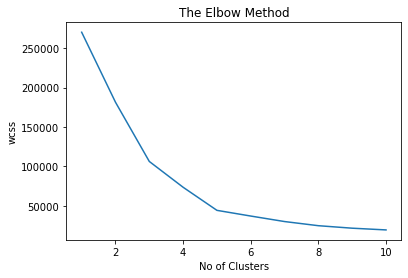

In [11]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

<h4 align="justify">We can see that the elbow is at k = 5. Now we will
use k = 5 to cluster our data.<h4>

In [12]:
finalModel = KMeans(n_clusters= 5, init='k-means++', random_state=42)
finalModel.fit(X)
y_out = finalModel.predict(X)

In [13]:
type(y_out)

numpy.ndarray

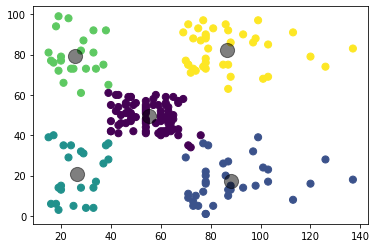

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y_out, s=50, cmap='viridis')

centers = finalModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)